In [8]:
# import standard python libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import cooler

# import core packages
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations
import os

# import semi-core packages
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
plt.style.use('seaborn-v0_8-poster')
import numpy as np
import pandas as pd
from multiprocessing import Pool

# import open2c libraries
import bioframe

import cooltools

from packaging import version
if version.parse(cooltools.__version__) < version.parse('0.5.2'):
    raise AssertionError("tutorial relies on cooltools version 0.5.2 or higher,"+
                         "please check your cooltools version and update to the latest")

# count cpus
num_cpus = os.getenv('SLURM_CPUS_PER_TASK')
if not num_cpus:
    num_cpus = os.cpu_count()
num_cpus = int(num_cpus)

Convert loop file called with mustache

In [28]:
import pandas as pd

# Load your loop data
loops = pd.read_csv('/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250709_PnMs_merged_diploidGenome.20kb.tsv', sep='\t')

# Convert to BEDPE format (first six columns required)
bedpe = loops[[
    'BIN1_CHR', 'BIN1_START', 'BIN1_END',
    'BIN2_CHROMOSOME', 'BIN2_START', 'BIN2_END'
]].copy()

# Save in BEDPE format
bedpe.to_csv('/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250709_PnMs_merged_diploidGenome.20kb.loops.bedpe', sep='\t', header=False, index=False)

Plot loops

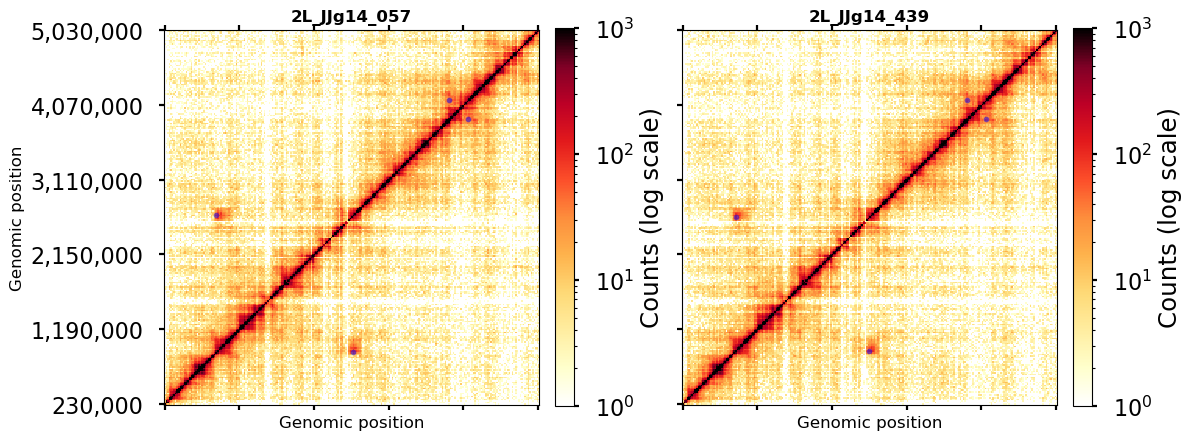

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cooler
from matplotlib.colors import LogNorm
from matplotlib.ticker import EngFormatter

# Load cooler and loops
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.20kb.cool")
loops = pd.read_csv('/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250709_PnMs_merged_diploidGenome.20kb.loops.bedpe', sep='\t', header=None)
loops.columns = ['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2']

# Regions and constants
#region1 = '2L_JJg14_057:500000-21830000'
#region2 = '2L_JJg14_439:500000-21830000'

region1 = '2L_JJg14_057:230000-5030000'
region2 = '2L_JJg14_439:230000-5030000'
bin_size = clr.binsize
norm = LogNorm(vmin=1, vmax=1000)
fruitpunch = sns.blend_palette(['white', 'red'], as_cmap=True)
bp_formatter = EngFormatter(sep="")

def format_ticks(ax, x=True, y=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
    ax.tick_params(axis='x', rotation=45)

def plot_loops_on_ax(ax, region, loops, bin_size, color='blue'):
    chrom, coords = region.split(':')
    start, end = map(int, coords.split('-'))
    #start, end = 30_000_000, 10_000_000
    for _, row in loops.iterrows():
        if row['chrom1'] == row['chrom2'] == chrom:
            b1 = (row['start1'] - start) // bin_size
            b2 = (row['start2'] - start) // bin_size
            if 0 <= b1 <= (end - start) // bin_size and 0 <= b2 <= (end - start) // bin_size:
                ax.plot(b2, b1, 'o', color=color, alpha=0.5, markersize=4)
                ax.plot(b1, b2, 'o', color=color, alpha=0.5, markersize=4)

# Create only bottom 2 log-scale subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
regions = [region1, region2]

for ax, region in zip(axs, regions):
    matrix = clr.matrix(balance=False).fetch(region)
    im = ax.matshow(matrix, cmap='fall', norm=norm, origin='lower')

    plot_loops_on_ax(ax, region, loops, bin_size, color='blue')
    reg=region.split(':')[0]
    ax.set_title(f"{reg}", fontsize=12, fontweight='bold')
    # Set genomic coordinate ticks
    chrom, coords = region.split(':')
    start, end = map(int, coords.split('-'))
    num_bins = matrix.shape[0]
    ticks = [i for i in range(0, num_bins, num_bins // 5)]  # adjust 5 to control number of ticks
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_yticklabels([f"{start + i * bin_size:,}" for i in ticks])
    ax.set_xticklabels(['' for _ in ticks])  # If you want no X labels


    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='Counts (log scale)')

# Axis labels
axs[0].set_ylabel('Genomic position', fontsize=12)
for ax in axs:
    ax.set_xlabel('Genomic position', fontsize=12)

plt.tight_layout()
plt.show()



2L entire chromosome

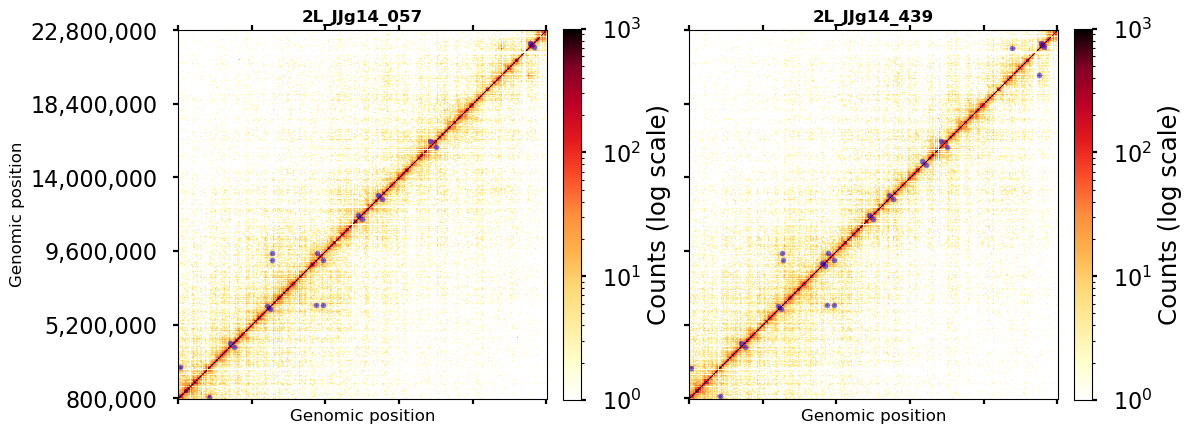

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cooler
from matplotlib.colors import LogNorm
from matplotlib.ticker import EngFormatter

# Load cooler and loops
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.20kb.cool")
loops = pd.read_csv('/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250709_PnMs_merged_diploidGenome.20kb.loops.bedpe', sep='\t', header=None)
loops.columns = ['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2']

# Regions and constants
#region1 = '2L_JJg14_057:500000-21830000'
#region2 = '2L_JJg14_439:500000-21830000'

region1 = '2L_JJg14_057:800000-22820000'
region2 = '2L_JJg14_439:800000-22820000'
bin_size = clr.binsize
norm = LogNorm(vmin=1, vmax=1000)
fruitpunch = sns.blend_palette(['white', 'red'], as_cmap=True)
bp_formatter = EngFormatter(sep="")

def format_ticks(ax, x=True, y=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
    ax.tick_params(axis='x', rotation=45)

def plot_loops_on_ax(ax, region, loops, bin_size, color='blue'):
    chrom, coords = region.split(':')
    start, end = map(int, coords.split('-'))
    #start, end = 30_000_000, 10_000_000
    for _, row in loops.iterrows():
        if row['chrom1'] == row['chrom2'] == chrom:
            b1 = (row['start1'] - start) // bin_size
            b2 = (row['start2'] - start) // bin_size
            if 0 <= b1 <= (end - start) // bin_size and 0 <= b2 <= (end - start) // bin_size:
                ax.plot(b2, b1, 'o', color=color, alpha=0.5, markersize=4)
                ax.plot(b1, b2, 'o', color=color, alpha=0.5, markersize=4)

# Create only bottom 2 log-scale subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
regions = [region1, region2]

for ax, region in zip(axs, regions):
    matrix = clr.matrix(balance=False).fetch(region)
    im = ax.matshow(matrix, cmap='fall', norm=norm, origin='lower')

    plot_loops_on_ax(ax, region, loops, bin_size, color='blue')
    reg=region.split(':')[0]
    ax.set_title(f"{reg}", fontsize=12, fontweight='bold')
    # Set genomic coordinate ticks
    chrom, coords = region.split(':')
    start, end = map(int, coords.split('-'))
    num_bins = matrix.shape[0]
    ticks = [i for i in range(0, num_bins, num_bins // 5)]  # adjust 5 to control number of ticks
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_yticklabels([f"{start + i * bin_size:,}" for i in ticks])
    ax.set_xticklabels(['' for _ in ticks])  # If you want no X labels


    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='Counts (log scale)')

# Axis labels
axs[0].set_ylabel('Genomic position', fontsize=12)
for ax in axs:
    ax.set_xlabel('Genomic position', fontsize=12)

plt.tight_layout()
plt.show()

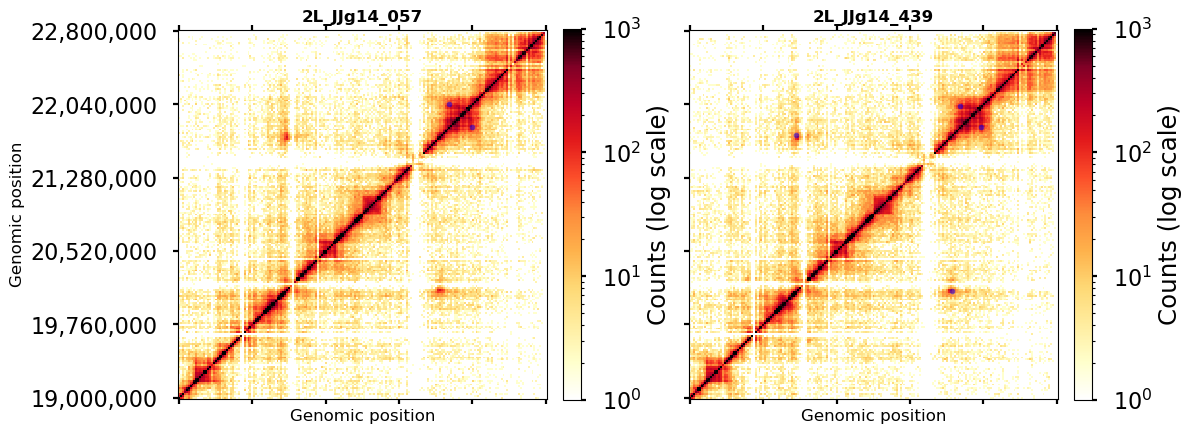

In [64]:
#2L zoomed in

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cooler
from matplotlib.colors import LogNorm
from matplotlib.ticker import EngFormatter

# Load cooler and loops
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.20kb.cool")
loops = pd.read_csv('/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250709_PnMs_merged_diploidGenome.20kb.loops.bedpe', sep='\t', header=None)
loops.columns = ['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2']

# Regions and constants
#region1 = '2L_JJg14_057:500000-21830000'
#region2 = '2L_JJg14_439:500000-21830000'

region1 = '2L_JJg14_057:19000000-22820000'
region2 = '2L_JJg14_439:19000000-22820000'
bin_size = clr.binsize
norm = LogNorm(vmin=1, vmax=1000)
fruitpunch = sns.blend_palette(['white', 'red'], as_cmap=True)
bp_formatter = EngFormatter(sep="")

def format_ticks(ax, x=True, y=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
    ax.tick_params(axis='x', rotation=45)

def plot_loops_on_ax(ax, region, loops, bin_size, color='blue'):
    chrom, coords = region.split(':')
    start, end = map(int, coords.split('-'))
    #start, end = 30_000_000, 10_000_000
    for _, row in loops.iterrows():
        if row['chrom1'] == row['chrom2'] == chrom:
            b1 = (row['start1'] - start) // bin_size
            b2 = (row['start2'] - start) // bin_size
            if 0 <= b1 <= (end - start) // bin_size and 0 <= b2 <= (end - start) // bin_size:
                ax.plot(b2, b1, 'o', color=color, alpha=0.5, markersize=4)
                ax.plot(b1, b2, 'o', color=color, alpha=0.5, markersize=4)

# Create only bottom 2 log-scale subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
regions = [region1, region2]

for ax, region in zip(axs, regions):
    matrix = clr.matrix(balance=False).fetch(region)
    im = ax.matshow(matrix, cmap='fall', norm=norm, origin='lower')

    plot_loops_on_ax(ax, region, loops, bin_size, color='blue')
    reg=region.split(':')[0]
    ax.set_title(f"{reg}", fontsize=12, fontweight='bold')
    # Set genomic coordinate ticks
    chrom, coords = region.split(':')
    start, end = map(int, coords.split('-'))
    num_bins = matrix.shape[0]
    ticks = [i for i in range(0, num_bins, num_bins // 5)]  # adjust 5 to control number of ticks
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_yticklabels([f"{start + i * bin_size:,}" for i in ticks])
    ax.set_xticklabels(['' for _ in ticks])  # If you want no X labels


    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='Counts (log scale)')

# Axis labels
axs[0].set_ylabel('Genomic position', fontsize=12)
for ax in axs:
    ax.set_xlabel('Genomic position', fontsize=12)

plt.tight_layout()
plt.show()

2R

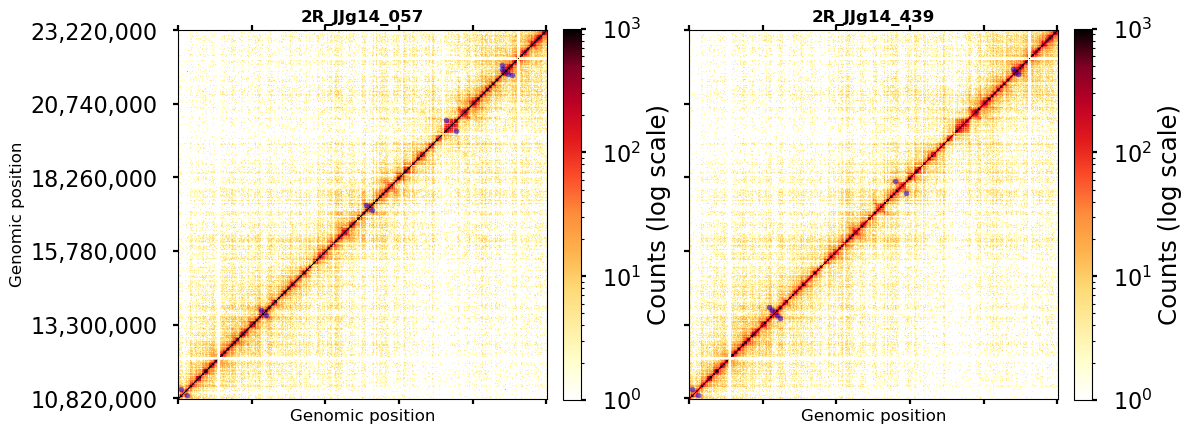

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cooler
from matplotlib.colors import LogNorm
from matplotlib.ticker import EngFormatter

# Load cooler and loops
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.20kb.cool")
loops = pd.read_csv('/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250709_PnMs_merged_diploidGenome.20kb.loops.bedpe', sep='\t', header=None)
loops.columns = ['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2']

# Regions and constants
#region1 = '2L_JJg14_057:500000-21830000'
#region2 = '2L_JJg14_439:500000-21830000'

region1 = '2R_JJg14_057:10820000-23240000'
region2 = '2R_JJg14_439:10820000-23240000 '
bin_size = clr.binsize
norm = LogNorm(vmin=1, vmax=1000)
fruitpunch = sns.blend_palette(['white', 'red'], as_cmap=True)
bp_formatter = EngFormatter(sep="")

def format_ticks(ax, x=True, y=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
    ax.tick_params(axis='x', rotation=45)

def plot_loops_on_ax(ax, region, loops, bin_size, color='blue'):
    chrom, coords = region.split(':')
    start, end = map(int, coords.split('-'))
    #start, end = 30_000_000, 10_000_000
    for _, row in loops.iterrows():
        if row['chrom1'] == row['chrom2'] == chrom:
            b1 = (row['start1'] - start) // bin_size
            b2 = (row['start2'] - start) // bin_size
            if 0 <= b1 <= (end - start) // bin_size and 0 <= b2 <= (end - start) // bin_size:
                ax.plot(b2, b1, 'o', color=color, alpha=0.5, markersize=4)
                ax.plot(b1, b2, 'o', color=color, alpha=0.5, markersize=4)

# Create only bottom 2 log-scale subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
regions = [region1, region2]

for ax, region in zip(axs, regions):
    matrix = clr.matrix(balance=False).fetch(region)
    im = ax.matshow(matrix, cmap='fall', norm=norm, origin='lower')

    plot_loops_on_ax(ax, region, loops, bin_size, color='blue')
    reg=region.split(':')[0]
    ax.set_title(f"{reg}", fontsize=12, fontweight='bold')
    # Set genomic coordinate ticks
    chrom, coords = region.split(':')
    start, end = map(int, coords.split('-'))
    num_bins = matrix.shape[0]
    ticks = [i for i in range(0, num_bins, num_bins // 5)]  # adjust 5 to control number of ticks
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_yticklabels([f"{start + i * bin_size:,}" for i in ticks])
    ax.set_xticklabels(['' for _ in ticks])  # If you want no X labels


    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='Counts (log scale)')

# Axis labels
axs[0].set_ylabel('Genomic position', fontsize=12)
for ax in axs:
    ax.set_xlabel('Genomic position', fontsize=12)

plt.tight_layout()
plt.show()

3L

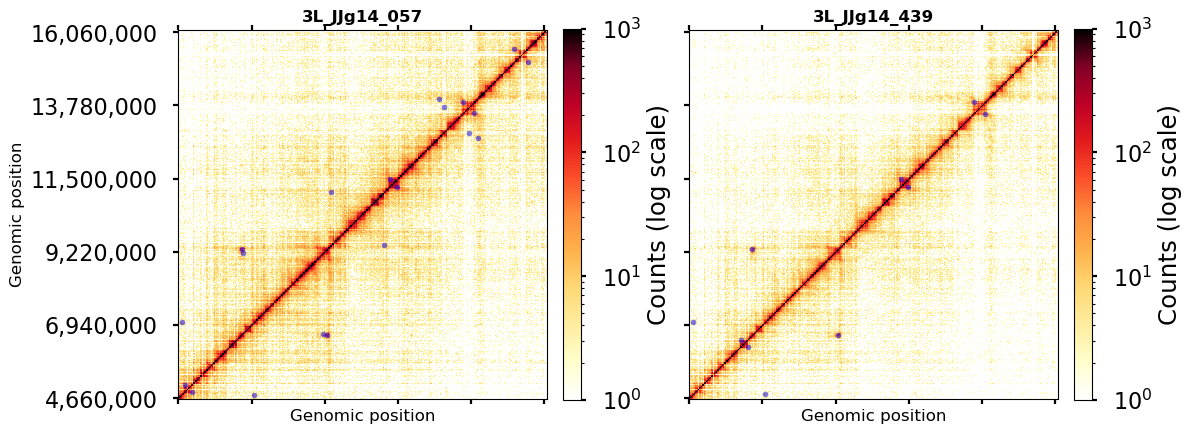

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cooler
from matplotlib.colors import LogNorm
from matplotlib.ticker import EngFormatter

# Load cooler and loops
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.20kb.cool")
loops = pd.read_csv('/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250709_PnMs_merged_diploidGenome.20kb.loops.bedpe', sep='\t', header=None)
loops.columns = ['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2']

# Regions and constants
#region1 = '2L_JJg14_057:500000-21830000'
#region2 = '2L_JJg14_439:500000-21830000'

region1 = '3L_JJg14_057:4660000-16140000'
region2 = '3L_JJg14_439:4660000-16140000'
bin_size = clr.binsize
norm = LogNorm(vmin=1, vmax=1000)
fruitpunch = sns.blend_palette(['white', 'red'], as_cmap=True)
bp_formatter = EngFormatter(sep="")

def format_ticks(ax, x=True, y=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
    ax.tick_params(axis='x', rotation=45)

def plot_loops_on_ax(ax, region, loops, bin_size, color='blue'):
    chrom, coords = region.split(':')
    start, end = map(int, coords.split('-'))
    #start, end = 30_000_000, 10_000_000
    for _, row in loops.iterrows():
        if row['chrom1'] == row['chrom2'] == chrom:
            b1 = (row['start1'] - start) // bin_size
            b2 = (row['start2'] - start) // bin_size
            if 0 <= b1 <= (end - start) // bin_size and 0 <= b2 <= (end - start) // bin_size:
                ax.plot(b2, b1, 'o', color=color, alpha=0.5, markersize=4)
                ax.plot(b1, b2, 'o', color=color, alpha=0.5, markersize=4)

# Create only bottom 2 log-scale subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
regions = [region1, region2]

for ax, region in zip(axs, regions):
    matrix = clr.matrix(balance=False).fetch(region)
    im = ax.matshow(matrix, cmap='fall', norm=norm, origin='lower')

    plot_loops_on_ax(ax, region, loops, bin_size, color='blue')
    reg=region.split(':')[0]
    ax.set_title(f"{reg}", fontsize=12, fontweight='bold')
    # Set genomic coordinate ticks
    chrom, coords = region.split(':')
    start, end = map(int, coords.split('-'))
    num_bins = matrix.shape[0]
    ticks = [i for i in range(0, num_bins, num_bins // 5)]  # adjust 5 to control number of ticks
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_yticklabels([f"{start + i * bin_size:,}" for i in ticks])
    ax.set_xticklabels(['' for _ in ticks])  # If you want no X labels


    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='Counts (log scale)')

# Axis labels
axs[0].set_ylabel('Genomic position', fontsize=12)
for ax in axs:
    ax.set_xlabel('Genomic position', fontsize=12)

plt.tight_layout()
plt.show()

3L zoomed in

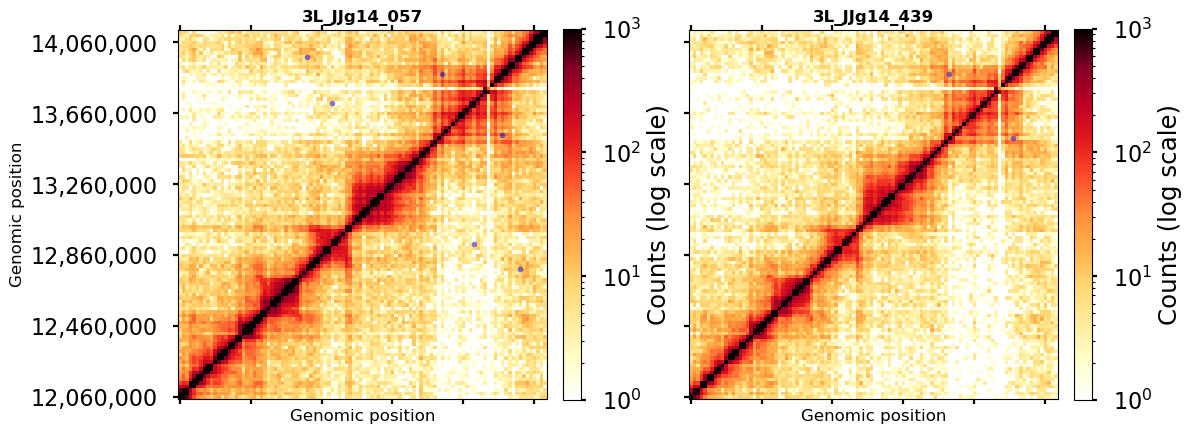

In [68]:
# Load cooler and loops
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.20kb.cool")
loops = pd.read_csv('/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250709_PnMs_merged_diploidGenome.20kb.loops.bedpe', sep='\t', header=None)
loops.columns = ['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2']

# Regions and constants
#region1 = '2L_JJg14_057:500000-21830000'
#region2 = '2L_JJg14_439:500000-21830000'

region1 = '3L_JJg14_057:12060000-14140000'
region2 = '3L_JJg14_439:12060000-14140000'
bin_size = clr.binsize
norm = LogNorm(vmin=1, vmax=1000)
fruitpunch = sns.blend_palette(['white', 'red'], as_cmap=True)
bp_formatter = EngFormatter(sep="")

def format_ticks(ax, x=True, y=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
    ax.tick_params(axis='x', rotation=45)

def plot_loops_on_ax(ax, region, loops, bin_size, color='blue'):
    chrom, coords = region.split(':')
    start, end = map(int, coords.split('-'))
    #start, end = 30_000_000, 10_000_000
    for _, row in loops.iterrows():
        if row['chrom1'] == row['chrom2'] == chrom:
            b1 = (row['start1'] - start) // bin_size
            b2 = (row['start2'] - start) // bin_size
            if 0 <= b1 <= (end - start) // bin_size and 0 <= b2 <= (end - start) // bin_size:
                ax.plot(b2, b1, 'o', color=color, alpha=0.5, markersize=4)
                ax.plot(b1, b2, 'o', color=color, alpha=0.5, markersize=4)

# Create only bottom 2 log-scale subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
regions = [region1, region2]

for ax, region in zip(axs, regions):
    matrix = clr.matrix(balance=False).fetch(region)
    im = ax.matshow(matrix, cmap='fall', norm=norm, origin='lower')

    plot_loops_on_ax(ax, region, loops, bin_size, color='blue')
    reg=region.split(':')[0]
    ax.set_title(f"{reg}", fontsize=12, fontweight='bold')
    # Set genomic coordinate ticks
    chrom, coords = region.split(':')
    start, end = map(int, coords.split('-'))
    num_bins = matrix.shape[0]
    ticks = [i for i in range(0, num_bins, num_bins // 5)]  # adjust 5 to control number of ticks
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_yticklabels([f"{start + i * bin_size:,}" for i in ticks])
    ax.set_xticklabels(['' for _ in ticks])  # If you want no X labels


    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='Counts (log scale)')

# Axis labels
axs[0].set_ylabel('Genomic position', fontsize=12)
for ax in axs:
    ax.set_xlabel('Genomic position', fontsize=12)

plt.tight_layout()
plt.show()

Trying to plot the balanced matrix instead

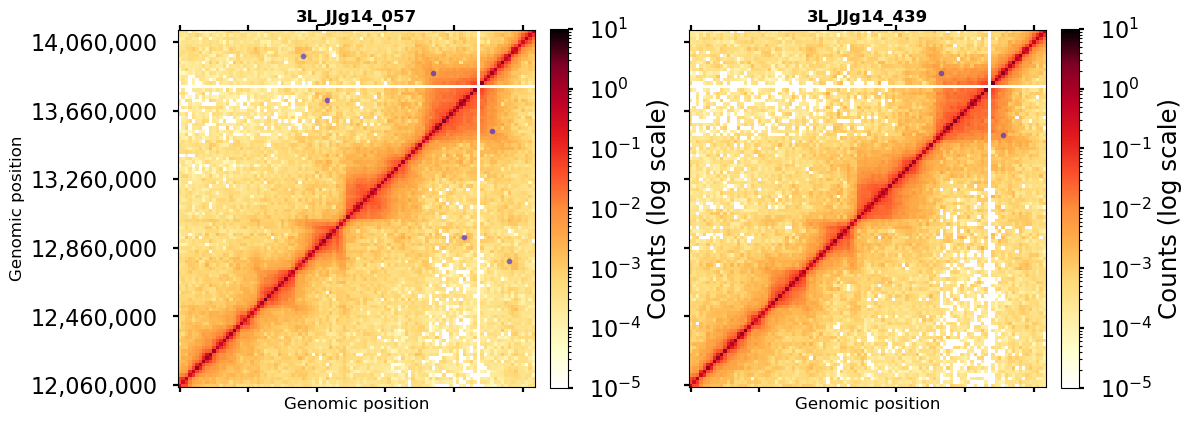

In [75]:
# Load cooler and loops
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.20kb.cool")
loops = pd.read_csv('/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250709_PnMs_merged_diploidGenome.20kb.loops.bedpe', sep='\t', header=None)
loops.columns = ['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2']

# Regions and constants
#region1 = '2L_JJg14_057:500000-21830000'
#region2 = '2L_JJg14_439:500000-21830000'

region1 = '3L_JJg14_057:12060000-14140000'
region2 = '3L_JJg14_439:12060000-14140000'
bin_size = clr.binsize
norm = LogNorm(vmin=1e-5, vmax=10)
fruitpunch = sns.blend_palette(['white', 'red'], as_cmap=True)
bp_formatter = EngFormatter(sep="")

def format_ticks(ax, x=True, y=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
    ax.tick_params(axis='x', rotation=45)

def plot_loops_on_ax(ax, region, loops, bin_size, color='blue'):
    chrom, coords = region.split(':')
    start, end = map(int, coords.split('-'))
    #start, end = 30_000_000, 10_000_000
    for _, row in loops.iterrows():
        if row['chrom1'] == row['chrom2'] == chrom:
            b1 = (row['start1'] - start) // bin_size
            b2 = (row['start2'] - start) // bin_size
            if 0 <= b1 <= (end - start) // bin_size and 0 <= b2 <= (end - start) // bin_size:
                ax.plot(b2, b1, 'o', color=color, alpha=0.5, markersize=4)
                ax.plot(b1, b2, 'o', color=color, alpha=0.5, markersize=4)

# Create only bottom 2 log-scale subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
regions = [region1, region2]

for ax, region in zip(axs, regions):
    matrix = clr.matrix(balance=True).fetch(region)
    matrix = np.ma.masked_invalid(matrix)
    im = ax.matshow(matrix, cmap='fall', norm=norm, origin='lower')

    plot_loops_on_ax(ax, region, loops, bin_size, color='blue')
    reg=region.split(':')[0]
    ax.set_title(f"{reg}", fontsize=12, fontweight='bold')
    # Set genomic coordinate ticks
    chrom, coords = region.split(':')
    start, end = map(int, coords.split('-'))
    num_bins = matrix.shape[0]
    ticks = [i for i in range(0, num_bins, num_bins // 5)]  # adjust 5 to control number of ticks
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_yticklabels([f"{start + i * bin_size:,}" for i in ticks])
    ax.set_xticklabels(['' for _ in ticks])  # If you want no X labels


    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='Counts (log scale)')

# Axis labels
axs[0].set_ylabel('Genomic position', fontsize=12)
for ax in axs:
    ax.set_xlabel('Genomic position', fontsize=12)

plt.tight_layout()
plt.show()

3R

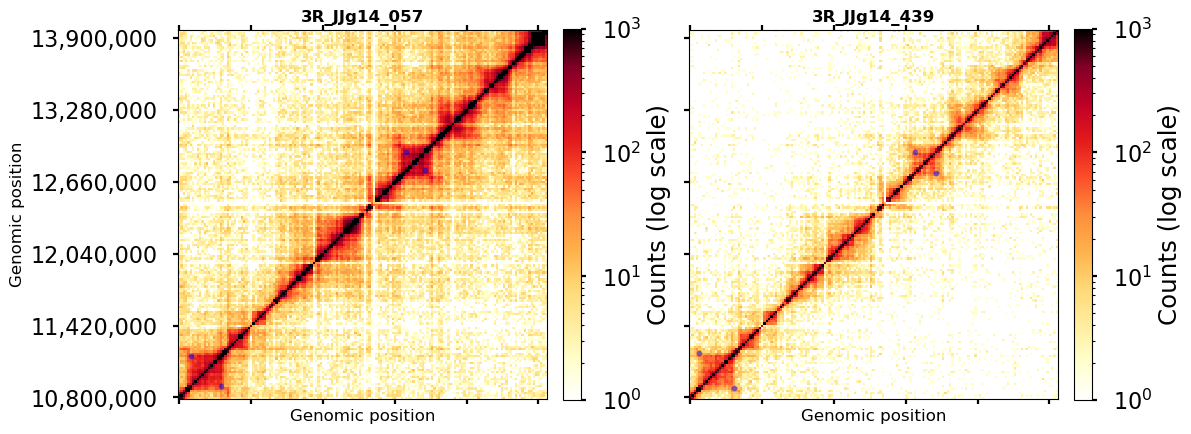

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cooler
from matplotlib.colors import LogNorm
from matplotlib.ticker import EngFormatter

# Load cooler and loops
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250403_PnMs_merged_diploidGenome.20kb.cool")
loops = pd.read_csv('/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250709_PnMs_merged_diploidGenome.20kb.loops.bedpe', sep='\t', header=None)
loops.columns = ['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2']

# Regions and constants


#region1 = '3R_JJg14_057:10800000-28980000'
#region2 = '3R_JJg14_439:10800000-28980000'


region1 = '3R_JJg14_057:10800000-13980000'
region2 = '3R_JJg14_439:10800000-13980000'

bin_size = clr.binsize
norm = LogNorm(vmin=1, vmax=1000)
fruitpunch = sns.blend_palette(['white', 'red'], as_cmap=True)
bp_formatter = EngFormatter(sep="")

def format_ticks(ax, x=True, y=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
    ax.tick_params(axis='x', rotation=45)

def plot_loops_on_ax(ax, region, loops, bin_size, color='blue'):
    chrom, coords = region.split(':')
    start, end = map(int, coords.split('-'))
    #start, end = 30_000_000, 10_000_000
    for _, row in loops.iterrows():
        if row['chrom1'] == row['chrom2'] == chrom:
            b1 = (row['start1'] - start) // bin_size
            b2 = (row['start2'] - start) // bin_size
            if 0 <= b1 <= (end - start) // bin_size and 0 <= b2 <= (end - start) // bin_size:
                ax.plot(b2, b1, 'o', color=color, alpha=0.5, markersize=4)
                ax.plot(b1, b2, 'o', color=color, alpha=0.5, markersize=4)

# Create only bottom 2 log-scale subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
regions = [region1, region2]

for ax, region in zip(axs, regions):
    matrix = clr.matrix(balance=False).fetch(region)
    im = ax.matshow(matrix, cmap='fall', norm=norm, origin='lower')

    plot_loops_on_ax(ax, region, loops, bin_size, color='blue')
    reg=region.split(':')[0]
    ax.set_title(f"{reg}", fontsize=12, fontweight='bold')
    # Set genomic coordinate ticks
    chrom, coords = region.split(':')
    start, end = map(int, coords.split('-'))
    num_bins = matrix.shape[0]
    ticks = [i for i in range(0, num_bins, num_bins // 5)]  # adjust 5 to control number of ticks
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_yticklabels([f"{start + i * bin_size:,}" for i in ticks])
    ax.set_xticklabels(['' for _ in ticks])  # If you want no X labels

    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='Counts (log scale)')

# Axis labels
axs[0].set_ylabel('Genomic position', fontsize=12)
for ax in axs:
    ax.set_xlabel('Genomic position', fontsize=12)

plt.tight_layout()
plt.show()


Take a look at the trans loops

In [76]:
# Load your loop data
loops = pd.read_csv('/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_PnMs_merged.filtCisTrans.ImportantChrom.tsv', sep='\t')

# Convert to BEDPE format (first six columns required)
bedpe = loops[[
    'BIN1_CHR', 'BIN1_START', 'BIN1_END',
    'BIN2_CHROMOSOME', 'BIN2_START', 'BIN2_END'
]].copy()

# Save in BEDPE format
bedpe.to_csv('/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_PnMs_merged.filtCisTrans.ImportantChrom.loops.bedpe', sep='\t', header=False, index=False)

Loops trans vs mat vs pat

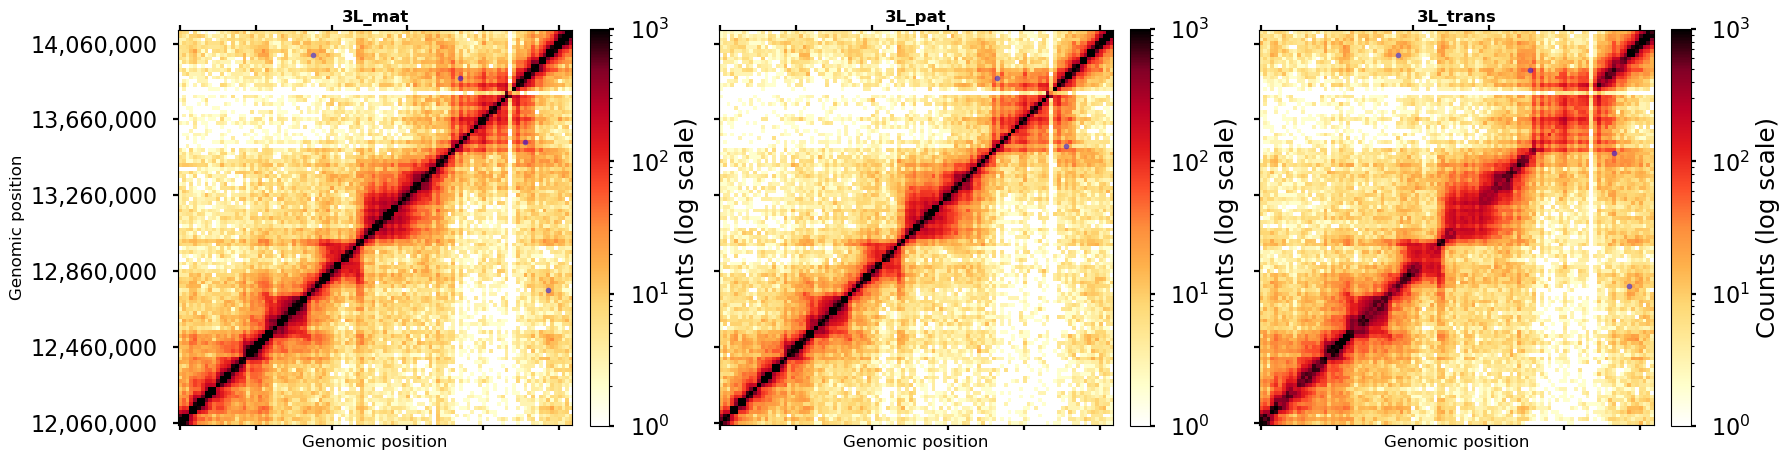

In [79]:
# Load cooler and loops
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_PnMs_merged.filtCisTrans.ImportantChrom.cool")
loops = pd.read_csv('/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_PnMs_merged.filtCisTrans.ImportantChrom.loops.bedpe', sep='\t', header=None)
loops.columns = ['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2']

# Regions and constants

region1 = '3L_mat:12060000-14140000'
region2 = '3L_pat:12060000-14140000'
region3 = '3L_trans:12060000-14140000'

bin_size = clr.binsize
norm = LogNorm(vmin=1, vmax=1000)
fruitpunch = sns.blend_palette(['white', 'red'], as_cmap=True)
bp_formatter = EngFormatter(sep="")

def format_ticks(ax, x=True, y=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
    ax.tick_params(axis='x', rotation=45)

def plot_loops_on_ax(ax, region, loops, bin_size, color='blue'):
    chrom, coords = region.split(':')
    start, end = map(int, coords.split('-'))
    #start, end = 30_000_000, 10_000_000
    for _, row in loops.iterrows():
        if row['chrom1'] == row['chrom2'] == chrom:
            b1 = (row['start1'] - start) // bin_size
            b2 = (row['start2'] - start) // bin_size
            if 0 <= b1 <= (end - start) // bin_size and 0 <= b2 <= (end - start) // bin_size:
                ax.plot(b2, b1, 'o', color=color, alpha=0.5, markersize=4)
                ax.plot(b1, b2, 'o', color=color, alpha=0.5, markersize=4)

# Create only bottom 2 log-scale subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
regions = [region1, region2, region3]

for ax, region in zip(axs, regions):
    matrix = clr.matrix(balance=False).fetch(region)
    im = ax.matshow(matrix, cmap='fall', norm=norm, origin='lower')

    plot_loops_on_ax(ax, region, loops, bin_size, color='blue')
    reg=region.split(':')[0]
    ax.set_title(f"{reg}", fontsize=12, fontweight='bold')
    # Set genomic coordinate ticks
    chrom, coords = region.split(':')
    start, end = map(int, coords.split('-'))
    num_bins = matrix.shape[0]
    ticks = [i for i in range(0, num_bins, num_bins // 5)]  # adjust 5 to control number of ticks
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_yticklabels([f"{start + i * bin_size:,}" for i in ticks])
    ax.set_xticklabels(['' for _ in ticks])  # If you want no X labels


    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='Counts (log scale)')

# Axis labels
axs[0].set_ylabel('Genomic position', fontsize=12)
for ax in axs:
    ax.set_xlabel('Genomic position', fontsize=12)

plt.tight_layout()
plt.show()

Doing the same with the balanced cooler

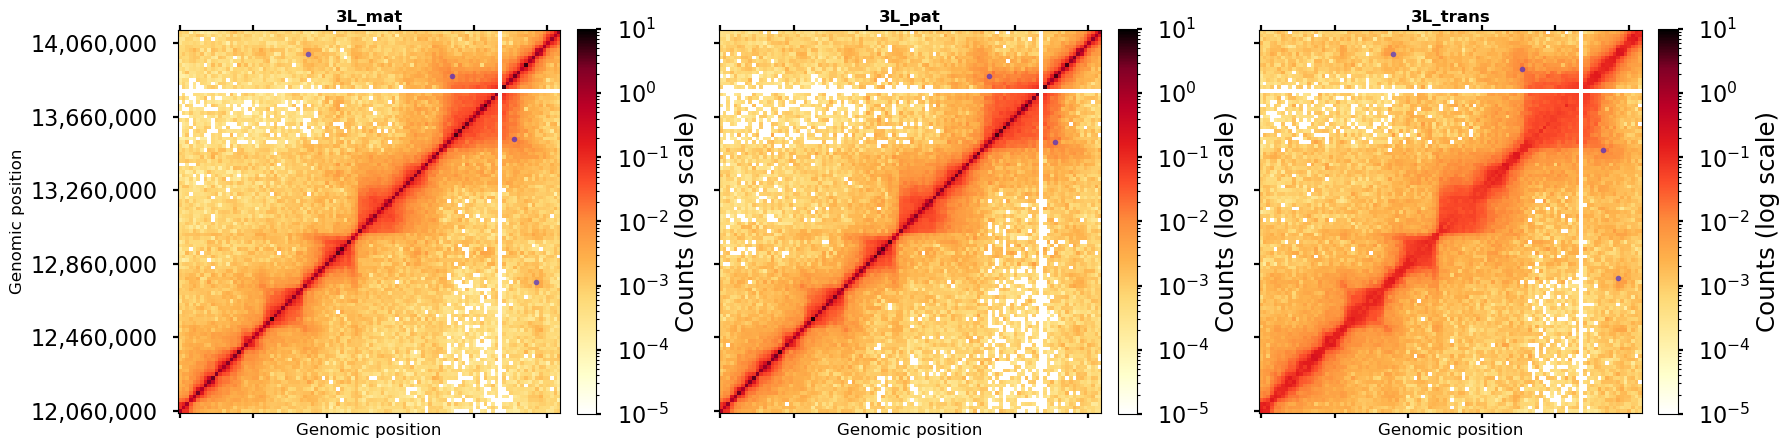

In [81]:
# Load cooler and loops
clr = cooler.Cooler("/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_PnMs_merged.filtCisTrans.ImportantChrom.cool")
loops = pd.read_csv('/data/alhajabed/FlyHiC/PoreC/20250625_balancedMcools/20250708_PnMs_merged.filtCisTrans.ImportantChrom.loops.bedpe', sep='\t', header=None)
loops.columns = ['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2']

# Regions and constants

region1 = '3L_mat:12060000-14140000'
region2 = '3L_pat:12060000-14140000'
region3 = '3L_trans:12060000-14140000'

bin_size = clr.binsize
norm = LogNorm(vmin=1e-5, vmax=10)
fruitpunch = sns.blend_palette(['white', 'red'], as_cmap=True)
bp_formatter = EngFormatter(sep="")

def format_ticks(ax, x=True, y=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
    ax.tick_params(axis='x', rotation=45)

def plot_loops_on_ax(ax, region, loops, bin_size, color='blue'):
    chrom, coords = region.split(':')
    start, end = map(int, coords.split('-'))
    #start, end = 30_000_000, 10_000_000
    for _, row in loops.iterrows():
        if row['chrom1'] == row['chrom2'] == chrom:
            b1 = (row['start1'] - start) // bin_size
            b2 = (row['start2'] - start) // bin_size
            if 0 <= b1 <= (end - start) // bin_size and 0 <= b2 <= (end - start) // bin_size:
                ax.plot(b2, b1, 'o', color=color, alpha=0.5, markersize=4)
                ax.plot(b1, b2, 'o', color=color, alpha=0.5, markersize=4)

# Create only bottom 2 log-scale subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
regions = [region1, region2, region3]

for ax, region in zip(axs, regions):
    matrix = clr.matrix(balance=True).fetch(region)
    im = ax.matshow(matrix, cmap='fall', norm=norm, origin='lower')

    plot_loops_on_ax(ax, region, loops, bin_size, color='blue')
    reg=region.split(':')[0]
    ax.set_title(f"{reg}", fontsize=12, fontweight='bold')
    # Set genomic coordinate ticks
    chrom, coords = region.split(':')
    start, end = map(int, coords.split('-'))
    num_bins = matrix.shape[0]
    ticks = [i for i in range(0, num_bins, num_bins // 5)]  # adjust 5 to control number of ticks
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_yticklabels([f"{start + i * bin_size:,}" for i in ticks])
    ax.set_xticklabels(['' for _ in ticks])  # If you want no X labels


    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='Counts (log scale)')

# Axis labels
axs[0].set_ylabel('Genomic position', fontsize=12)
for ax in axs:
    ax.set_xlabel('Genomic position', fontsize=12)

plt.tight_layout()
plt.show()